<a href="https://colab.research.google.com/github/apoorvaec1030/marketing/blob/main/MMM_Social_media_platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script sets up a simple Marketing Mix Model (MMM) for TikTok, estimating the impact of various marketing channels on conversions. It includes:

Data simulation for spend across different channels (TV, social media, search ads, influencers). Exploratory Data Analysis (EDA) using Seaborn. Ordinary Least Squares (OLS) regression model to estimate channel effectiveness. Prediction visualization to compare actual vs. predicted conversions.

I've added a media saturation effect using a diminishing returns function, which applies non-linear scaling to marketing spend.

1. **Data simulation** for spend across different channels (TV, social media, search ads, influencers).

2. **Exploratory Data Analysis** (EDA) using Seaborn.

3. **Ordinary Least Squares** (OLS) regression model to estimate channel effectiveness.

4. **Prediction visualization** to compare actual vs. predicted conversions.

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated Data Generation
np.random.seed(42)
days = 365
date_range = pd.date_range(start='2024-01-01', periods=days, freq='D')

# Simulating marketing spend channels
tv_spend = np.random.uniform(1000, 5000, days)
social_media_spend = np.random.uniform(500, 3000, days)
search_ads_spend = np.random.uniform(800, 4000, days)
influencer_spend = np.random.uniform(200, 1500, days)


<ipython-input-5-820c782056a1>:3: RuntimeWarning: invalid value encountered in divide
  return (spend ** beta) / (spend ** beta + alpha * spend)
<ipython-input-5-820c782056a1>:3: RuntimeWarning: invalid value encountered in scalar divide
  return (spend ** beta) / (spend ** beta + alpha * spend)


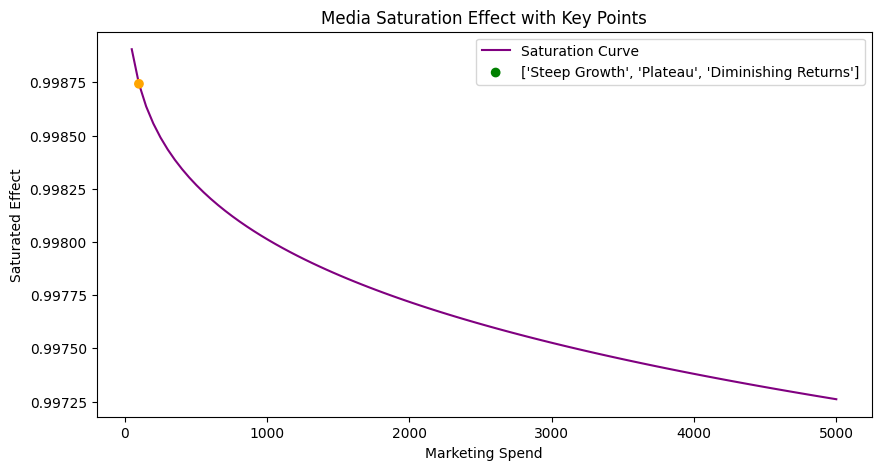

In [5]:

# Applying media saturation effect using diminishing returns function
def saturation_effect(spend, alpha=0.0005, beta=0.8):
    return (spend ** beta) / (spend ** beta + alpha * spend)

tv_spend_sat = saturation_effect(tv_spend)
social_media_spend_sat = saturation_effect(social_media_spend)
search_ads_spend_sat = saturation_effect(search_ads_spend)
influencer_spend_sat = saturation_effect(influencer_spend)

# Visualizing Saturation Curves
spend_range = np.linspace(0, 5000, 100)
saturation_values = saturation_effect(spend_range)

plt.figure(figsize=(10, 5))
plt.plot(spend_range, saturation_values, label='Saturation Curve', color='purple')


# Identifying key points
steep_point = spend_range[np.argmax(np.gradient(saturation_values))]
plateau_point = spend_range[np.argmax(saturation_values)]
diminishing_point = spend_range[np.argmax(np.gradient(saturation_values) < 0.01)]

plt.scatter([steep_point, plateau_point, diminishing_point],
            [saturation_effect(steep_point), saturation_effect(plateau_point), saturation_effect(diminishing_point)],
            color=['green', 'red', 'orange'],
            label=['Steep Growth', 'Plateau', 'Diminishing Returns'],
            zorder=3)

plt.xlabel('Marketing Spend')
plt.ylabel('Saturated Effect')
plt.title('Media Saturation Effect with Key Points')
plt.legend()
plt.show()


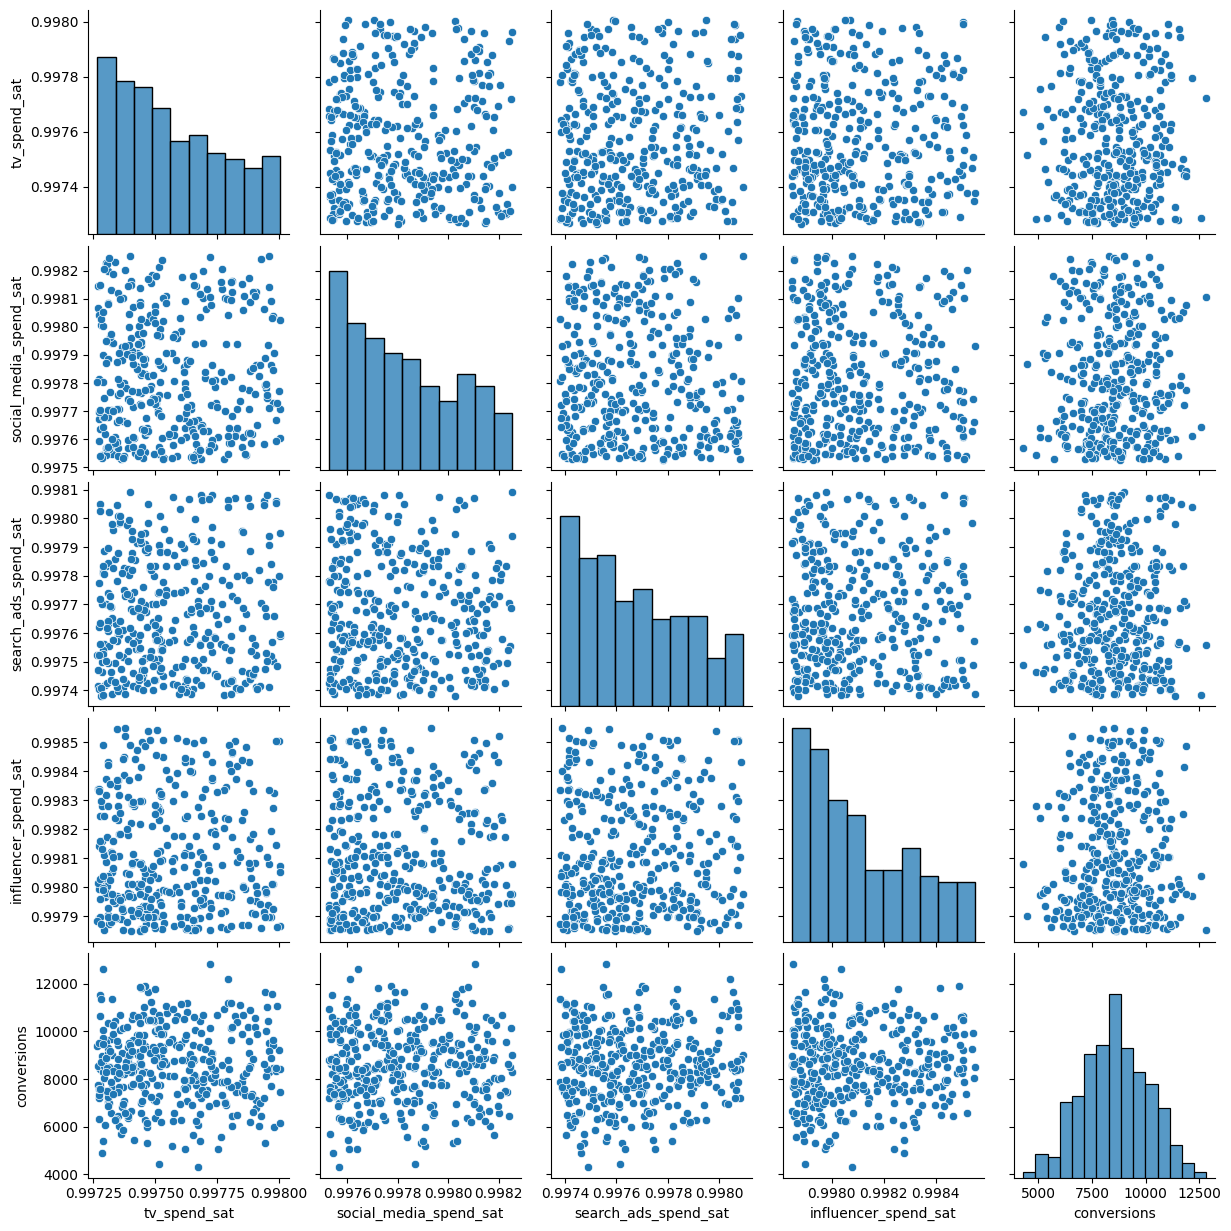

In [6]:

# Simulating organic factors
seasonality = 1000 + 500 * np.sin(np.linspace(0, 2*np.pi, days))
trend = np.linspace(5000, 10000, days)
random_noise = np.random.normal(0, 1000, days)

# Creating response variable: conversions
conversions = (0.3 * tv_spend_sat + 0.5 * social_media_spend_sat + 0.4 * search_ads_spend_sat +
               0.6 * influencer_spend_sat + seasonality + trend + random_noise)

# Creating DataFrame
df = pd.DataFrame({
    'date': date_range,
    'tv_spend': tv_spend,
    'social_media_spend': social_media_spend,
    'search_ads_spend': search_ads_spend,
    'influencer_spend': influencer_spend,
    'tv_spend_sat': tv_spend_sat,
    'social_media_spend_sat': social_media_spend_sat,
    'search_ads_spend_sat': search_ads_spend_sat,
    'influencer_spend_sat': influencer_spend_sat,
    'conversions': conversions
})

df.set_index('date', inplace=True)

# Exploratory Data Analysis
sns.pairplot(df[['tv_spend_sat', 'social_media_spend_sat', 'search_ads_spend_sat', 'influencer_spend_sat', 'conversions']])
plt.show()


                            OLS Regression Results                            
Dep. Variable:            conversions   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3297
Date:                Mon, 03 Mar 2025   Prob (F-statistic):              0.858
Time:                        21:30:35   Log-Likelihood:                -3203.9
No. Observations:                 365   AIC:                             6418.
Df Residuals:                     360   BIC:                             6437.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -8.07

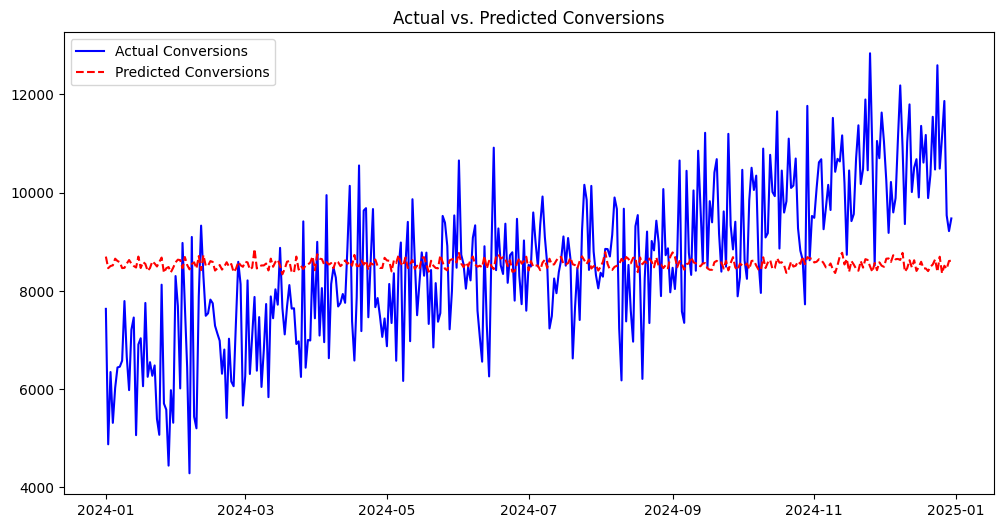

In [7]:

# Building the MMM Model
X = df[['tv_spend_sat', 'social_media_spend_sat', 'search_ads_spend_sat', 'influencer_spend_sat']]
X = sm.add_constant(X)  # Add intercept
y = df['conversions']
model = sm.OLS(y, X).fit()

# Model Summary
print(model.summary())

# Visualizing Model Predictions
df['predicted_conversions'] = model.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['conversions'], label='Actual Conversions', color='blue')
plt.plot(df.index, df['predicted_conversions'], label='Predicted Conversions', color='red', linestyle='dashed')
plt.legend()
plt.title('Actual vs. Predicted Conversions')
plt.show()
